## EDA on Tesla Stock Data Analyis

Exploratory Data Analysis or EDA, is an important step to be performed in Data Science projects. EDA is generally the process of visualising datasets to find out different patterns in the datasets, analyzing the anomalies behaviour.

## Step 1. Importing Libraries

We always intialize by importing the important libararies for performing EDA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from pandas.plotting import table

import warnings
warnings.filterwarnings('ignore')

## Step 2. Creating & Reading the data

In [8]:
# Load the dataset
tesla_stck = pd.read_csv(r'C:\Users\Nihaa\Documents\Python Sample Files\EDA\TSLA.csv')
tesla_stck.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [11]:
tesla_stck.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [12]:
tesla_stck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [14]:
tesla_stck.shape

(2416, 7)

In [16]:
tesla_stck.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [19]:
# This code converts the date which was in str format to an DateTime object
tesla_stck['Date']=pd.to_datetime(tesla_stck['Date'])

In [20]:
tesla_stck.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [21]:
# This code will limit the float value to 2 number
pd.set_option('display.float_format',lambda x:'%1.2f' % x) # this is a common default code

In [22]:
tesla_stck

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.49,576.81,558.08,566.90,566.90,11788500
2412,2020-01-29,575.69,589.80,567.43,580.99,580.99,17801500
2413,2020-01-30,632.42,650.88,618.00,640.81,640.81,29005700
2414,2020-01-31,640.00,653.00,632.52,650.57,650.57,15719300


We assign the value 'all' in the include attribute to make sure that categorical features are also in the result.

For numerical parameters - Fields like mean, standard d

In [29]:
# This is used to check weather the data set has any missing value
tesla_stck.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [30]:
# To check if there are any special character in place of values
for i in tesla_stck.columns:
    print({i:tesla_stck[i].unique()})

{'Date': array(['2010-06-29T00:00:00.000000000', '2010-06-30T00:00:00.000000000',
       '2010-07-01T00:00:00.000000000', ...,
       '2020-01-30T00:00:00.000000000', '2020-01-31T00:00:00.000000000',
       '2020-02-03T00:00:00.000000000'], dtype='datetime64[ns]')}
{'Open': array([ 19.      ,  25.790001,  25.      , ..., 632.419983, 640.      ,
       673.690002])}
{'High': array([ 25.      ,  30.42    ,  25.92    , ..., 650.880005, 653.      ,
       786.140015])}
{'Low': array([ 17.540001,  23.299999,  20.27    , ..., 618.      , 632.52002 ,
       673.52002 ])}
{'Close': array([ 23.889999,  23.83    ,  21.959999, ..., 640.809998, 650.570007,
       780.      ])}
{'Adj Close': array([ 23.889999,  23.83    ,  21.959999, ..., 640.809998, 650.570007,
       780.      ])}
{'Volume': array([18766300, 17187100,  8218800, ..., 29005700, 15719300, 47065000],
      dtype=int64)}


From the above observation we can conclude that there is no missing or unique value in the data. So, we won't eliminate or treat any missing values

## Step 5. Visualizing the given data into graphical format

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E54489D988>,
      dtype=object)

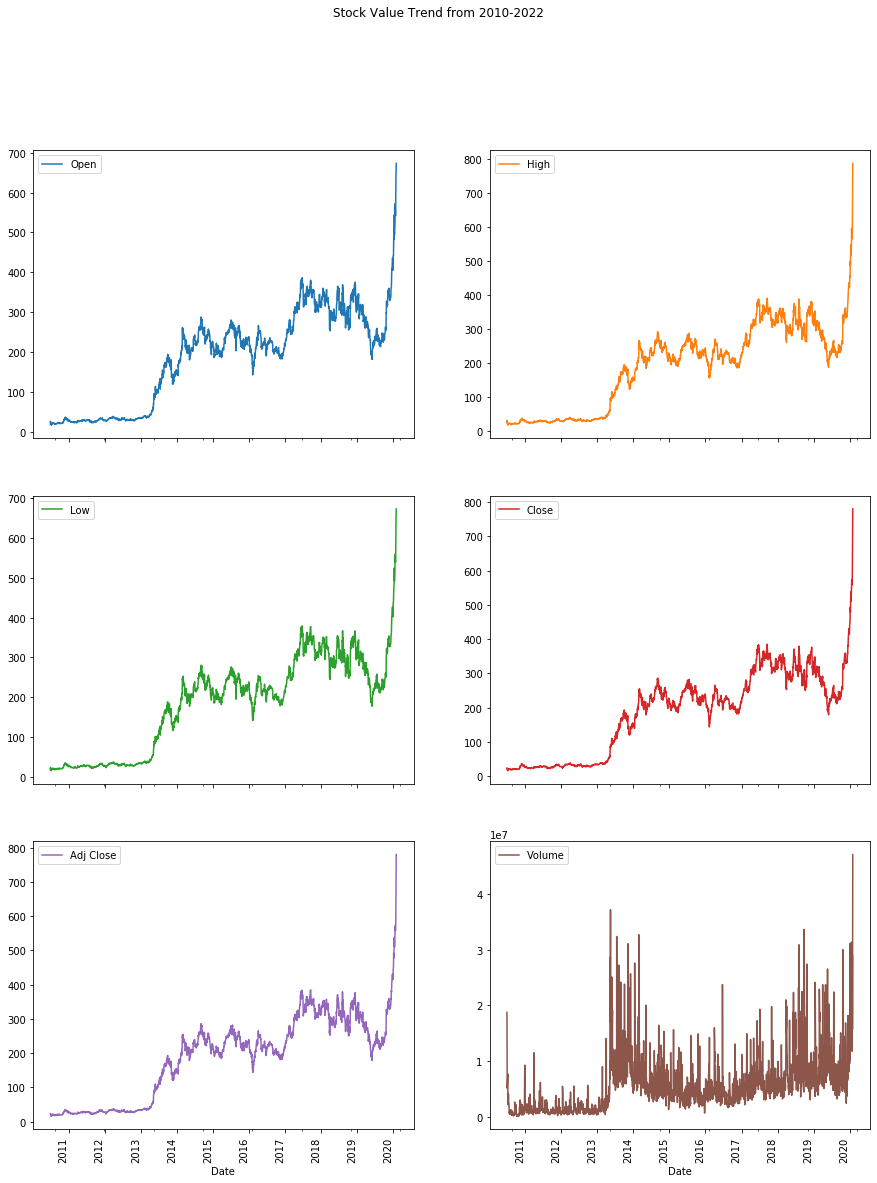

In [38]:
# Creating a list for numerical columns that are to be visualized
column_list = ['Open','High','Low','Close','Adj Close', 'Volume']

tesla_stck.plot(x = 'Date', y = column_list, subplots = True, layout=(3,2),
               figsize = (15,20), 
                title = "Stock Value Trend from 2010-2022",rot=90)

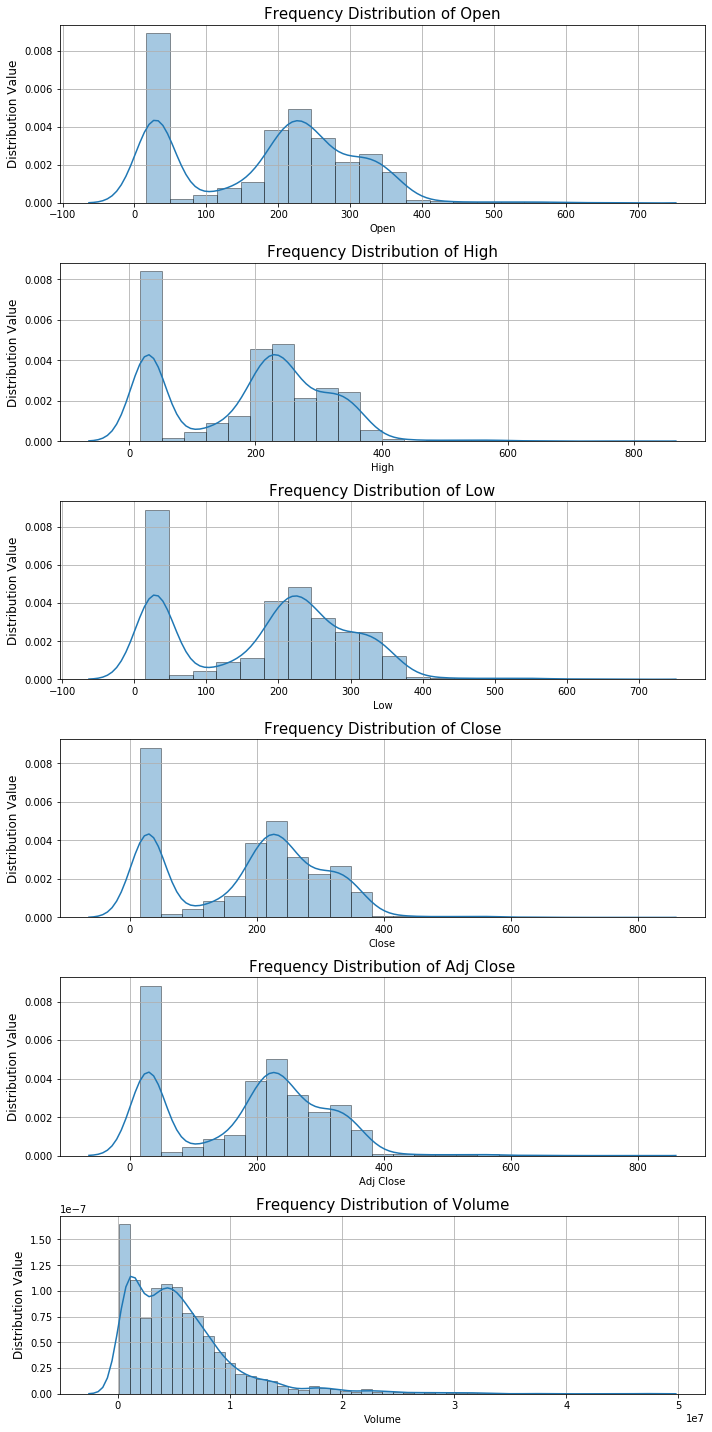

In [57]:
# Enumerate is used same way as loop but is also provide index position as well as the output
column_list = ['Open','High','Low','Close','Adj Close', 'Volume']
fig, ax = plt.subplots(len(column_list),figsize=(10,20))

for i,coln_lst in enumerate(column_list):
    sns.distplot(tesla_stck[coln_lst],hist=True,ax=ax[i],hist_kws=dict(edgecolor="black", linewidth=1))
    ax[i].set_title('Frequency Distribution of'+' '+coln_lst,fontsize=15)
    ax[i].set_xlabel(coln_lst,fontsize=10)
    ax[i].set_ylabel('Distribution Value',fontsize=12)
    fig.tight_layout(pad=1.1) # used to give spaces between plots
    ax[i].grid('on') # used to show grid line in the plots
    

#### 1. If the values are perfectly distributed than a bell shaped normalized curve will be formed
#### 2. If the values are showing skewness toward the left or the right then the data consists of outliers

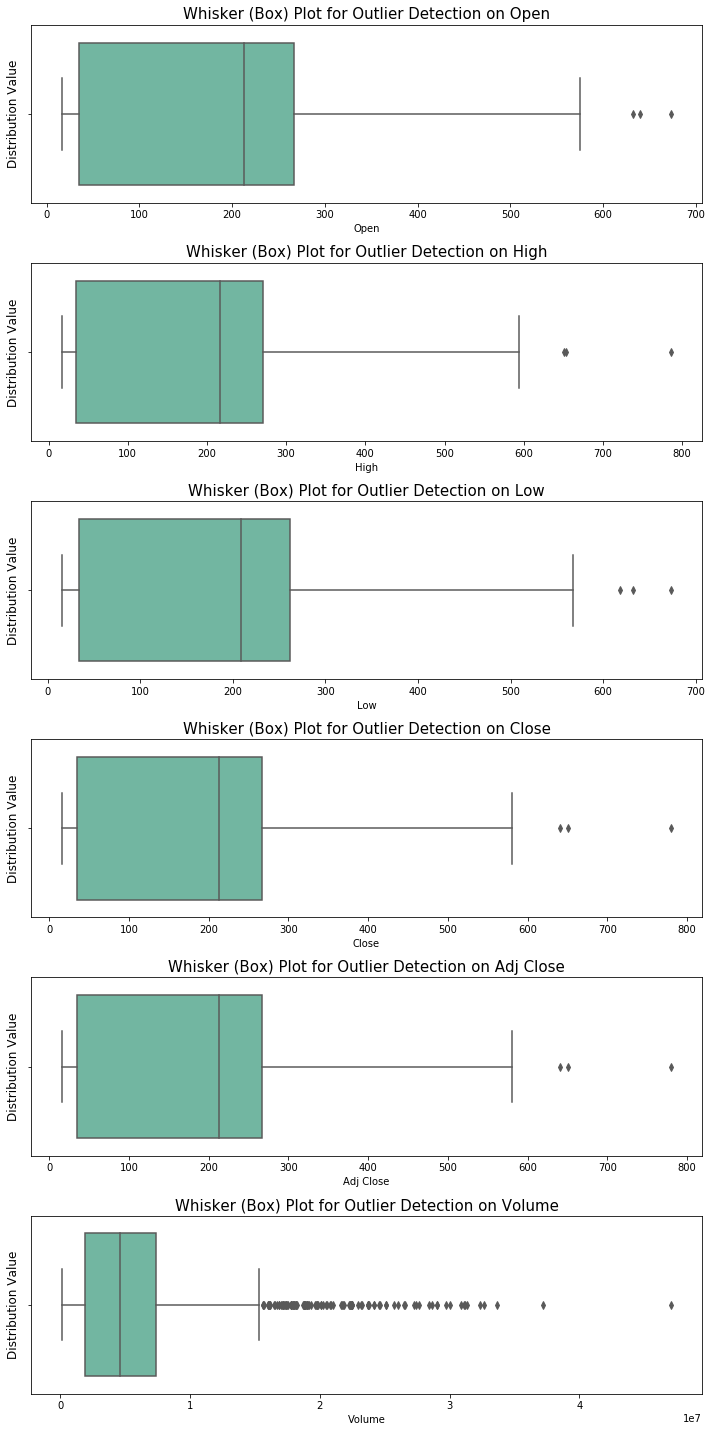

In [60]:
# Generating whisker plots to detect the presence of any outliers
fig, ax = plt.subplots(len(column_list),figsize=(10,20))

for i,coln_lst in enumerate(column_list):
    sns.boxplot(tesla_stck[coln_lst],ax=ax[i],palette = 'Set2',orient = 'h')
    ax[i].set_title('Whisker (Box) Plot for Outlier Detection on'+' '+coln_lst,fontsize=15)
    ax[i].set_ylabel('Distribution Value',fontsize=12)
    fig.tight_layout(pad=1.1)

Outliers are the anomalies present in the data i.e. value which is far away from the clustered value. The middle portion represents the inter-quartile range(IQR). The horizontal line in the middle represets the median of the data. The hollow circles near the tails are the representative of outlier. Cluster outliers can't be removed from the data. Outliers should be removed/treated or used in the data will be dependent on the logical validity of the value.

### When to use which plots

1. Scatter Plots/Relational Plots - To visaulize relation between two continous variable.
2. Histograms -  To visualize frequency distribution of a single continous numeric variable.
3. Countplot - To visualize frequency distribution of single categorical variable.
4. Bar Graphs - To visualize relation between one categorical and one numeric variable.
5. Boxplots - To visualize distribution of single continous variable but is mostly used to visualize outliers in the data.

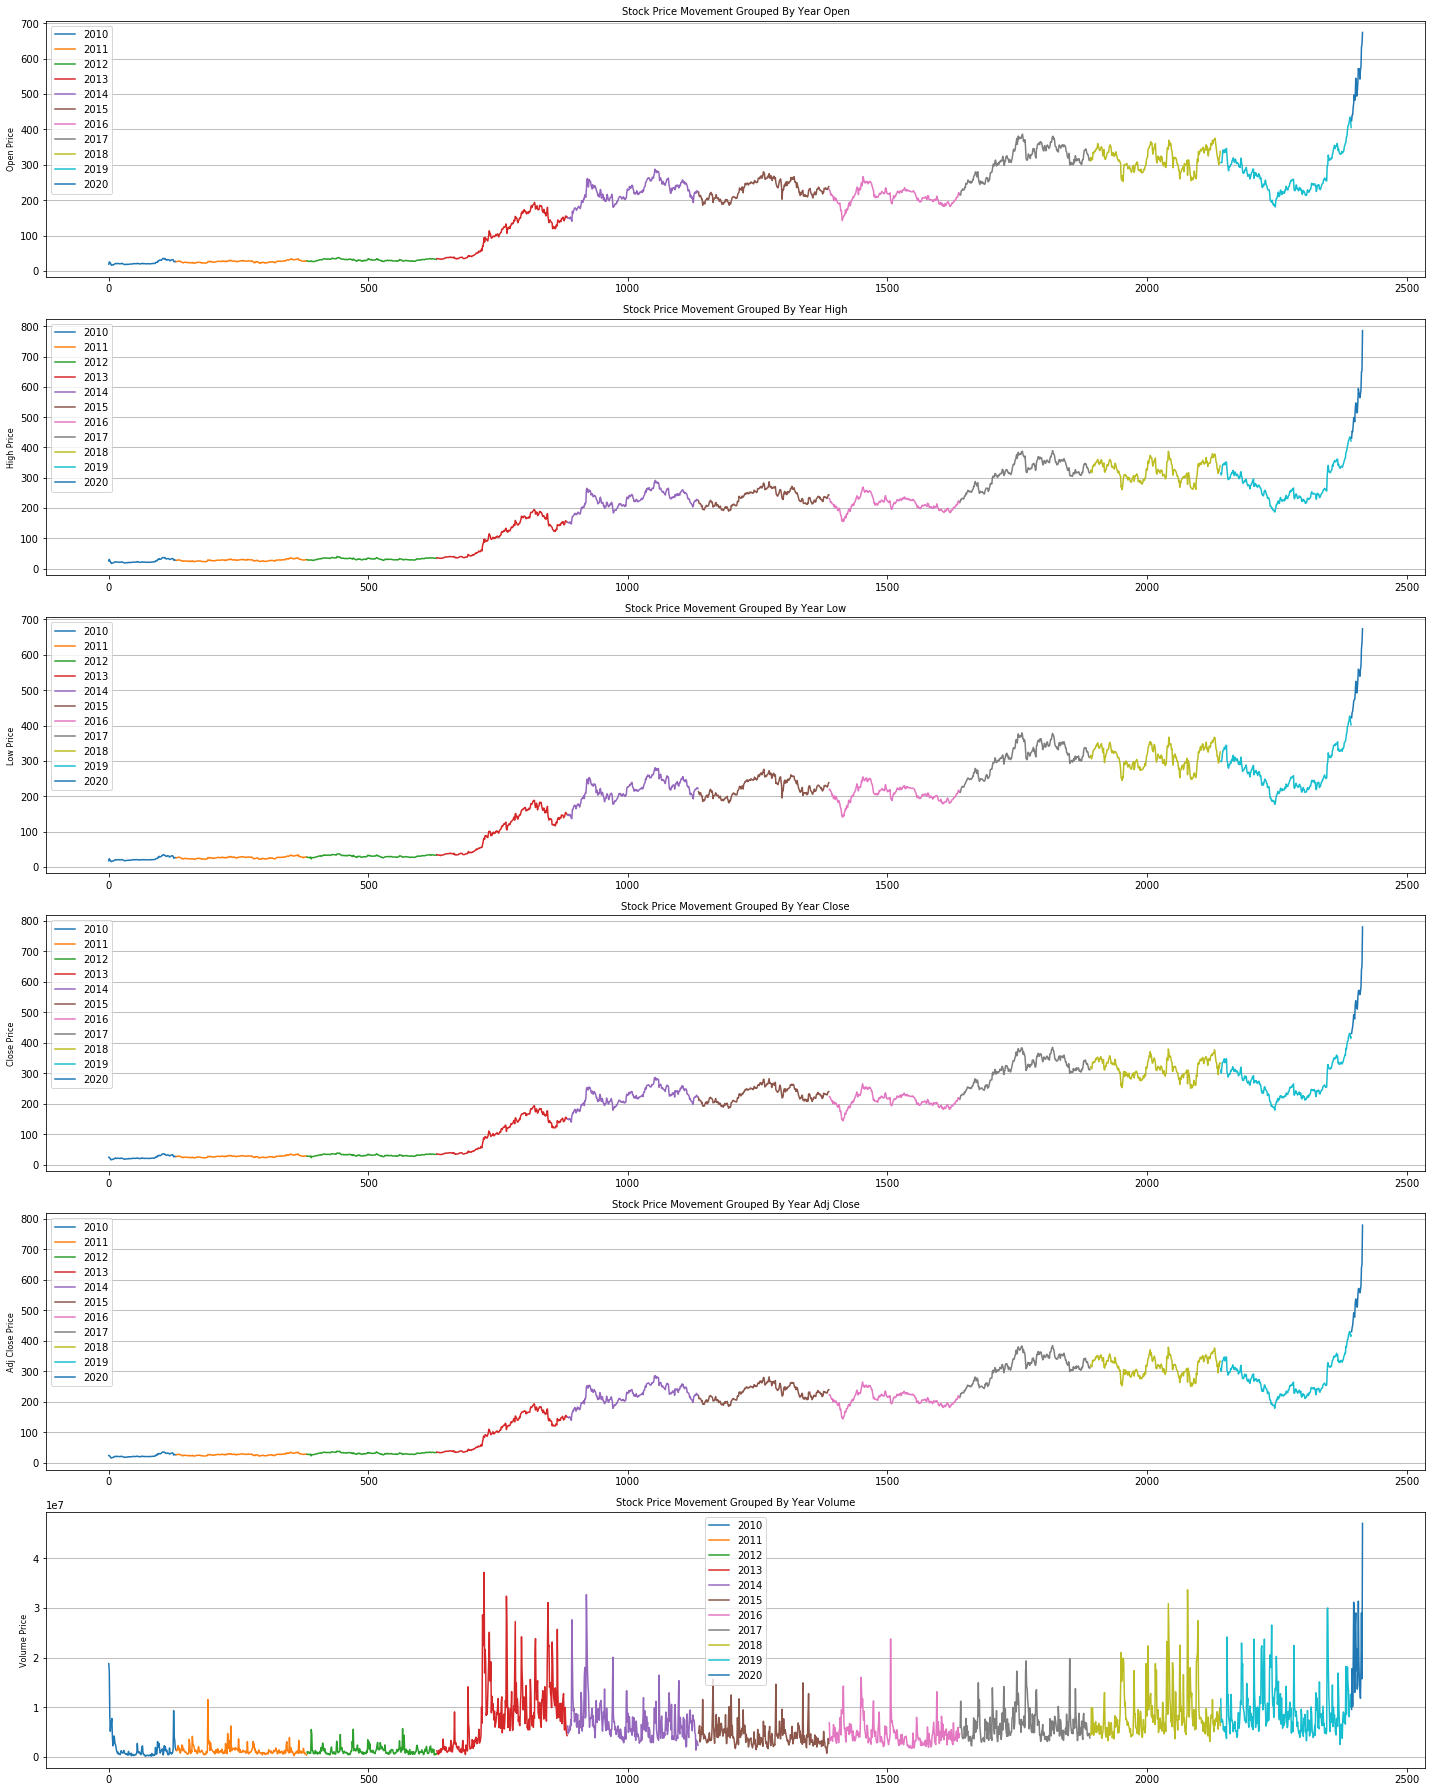

In [68]:
# Since the data is a time series data, we should be able to predict the future through forcasting Techniques

# Decomposing the time series year-wise and month-wise to analyse it further
tesla_stck['Year'] = tesla_stck['Date'].dt.year
tesla_stck['Month'] = tesla_stck['Date'].dt.month
tesla_stck['WeekDay'] = tesla_stck['Date'].dt.weekday

# Firstly plotting the data year-wise to see the duration of when it hiked and dipped
fig, ax=plt.subplots(len(column_list),figsize=(20,25))

# Group the data by year & its plot
for i, coln_lst in enumerate(column_list):
    tesla_stck.groupby('Year')[coln_lst].plot(ax=ax[i],legend=True)
    ax[i].set_title('Stock Price Movement Grouped By Year'+' '+coln_lst,fontsize=10)
    ax[i].set_ylabel(coln_lst+' '+'Price',fontsize=8)
    fig.tight_layout(pad=1.1)
    ax[i].yaxis.grid(True) # Enabling grid lines on Y axis.

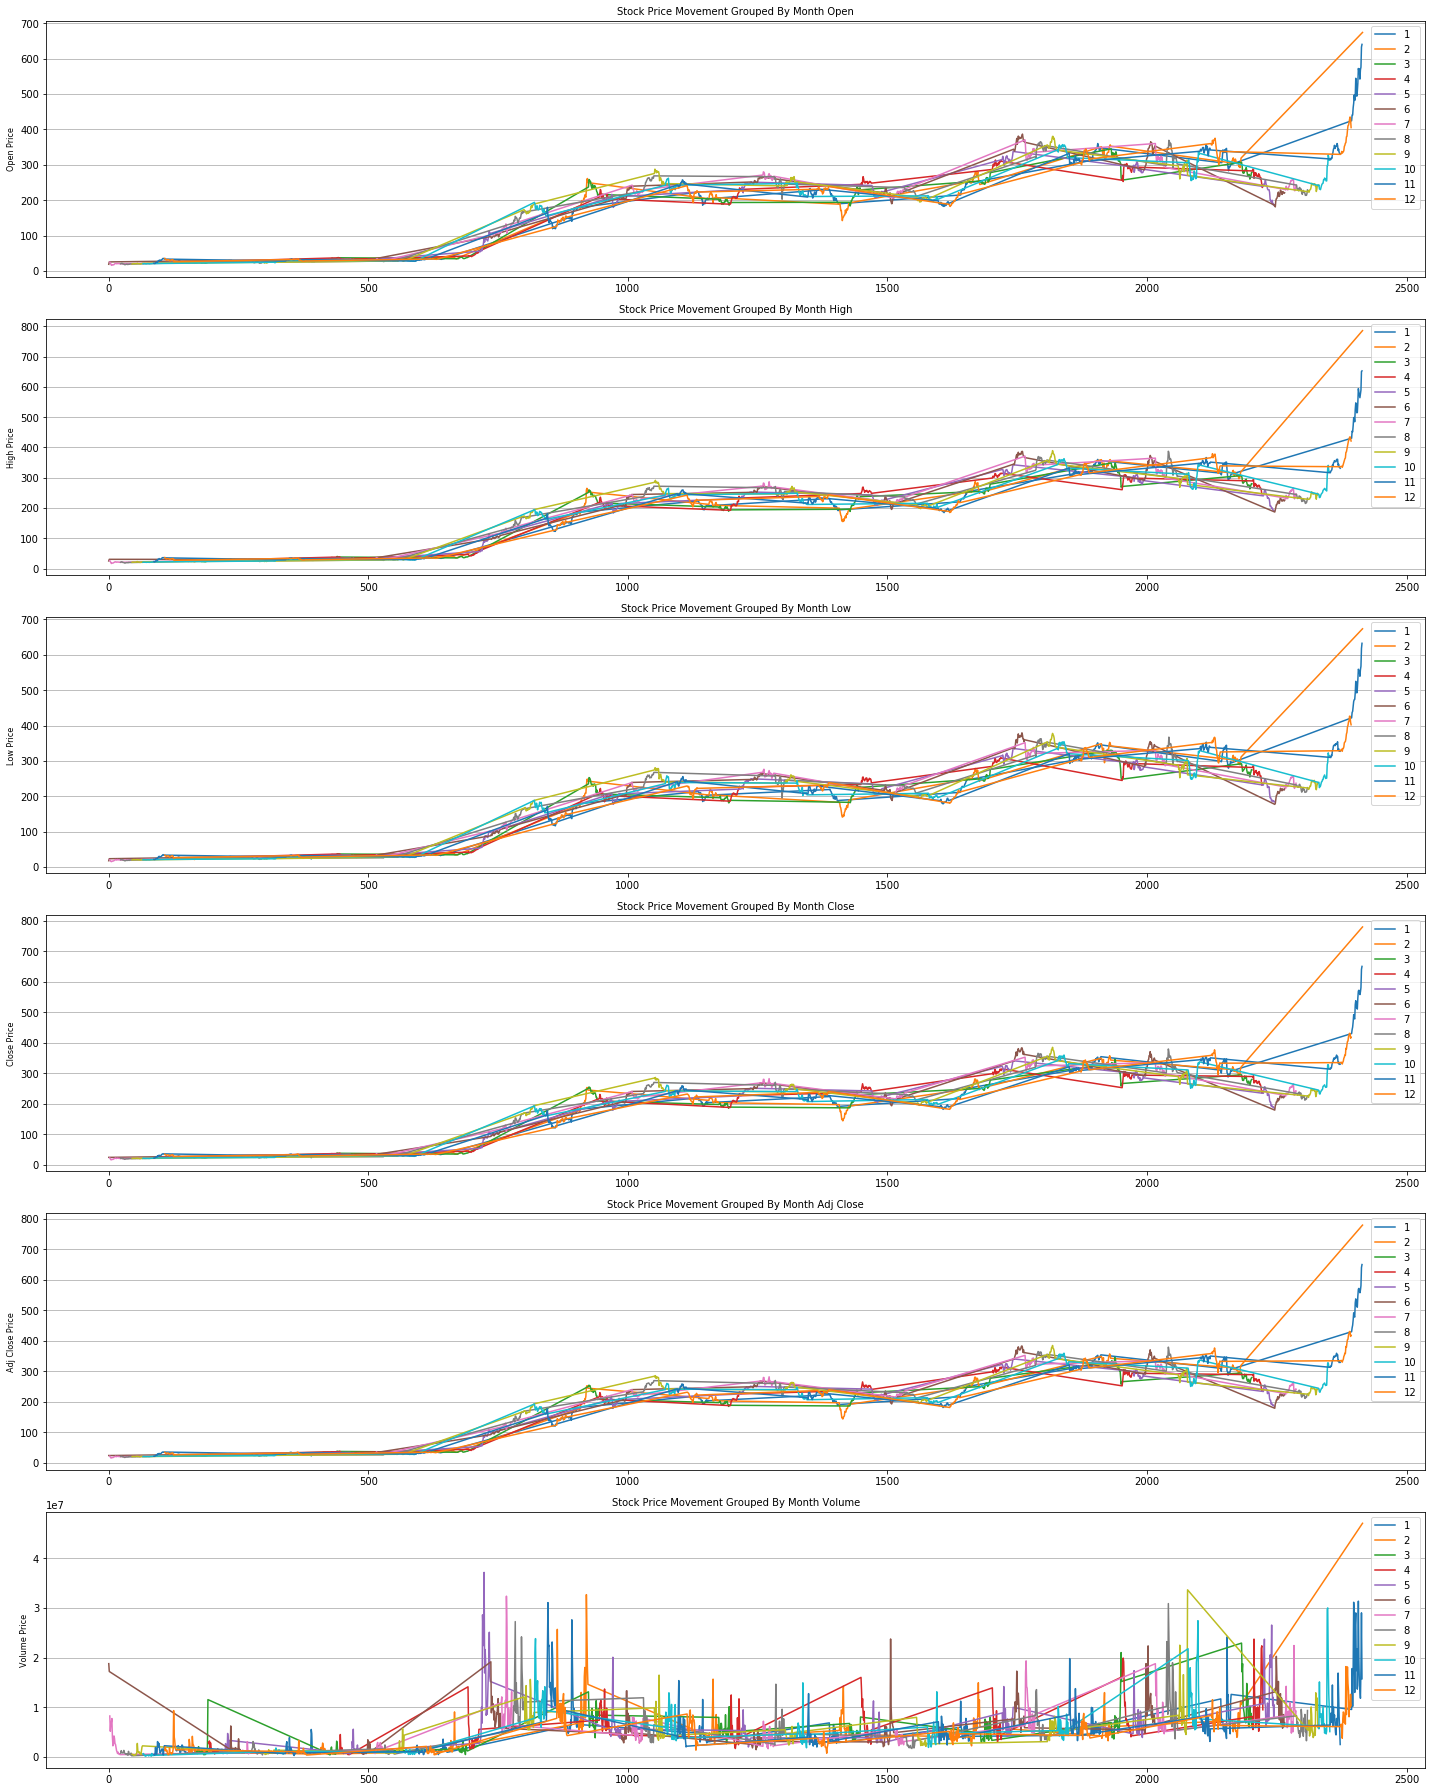

In [72]:
fig, ax=plt.subplots(len(column_list),figsize=(20,25))

# Group the data by year & its plot
for i, coln_lst in enumerate(column_list):
    tesla_stck.groupby('Month')[coln_lst].plot(ax=ax[i],legend=True)
    ax[i].set_title('Stock Price Movement Grouped By Month'+' '+coln_lst,fontsize=10)
    ax[i].set_ylabel(coln_lst+' '+'Price',fontsize=8)
    fig.tight_layout(pad=1.1)
    ax[i].yaxis.grid(True) # Enabling grid lines on Y axis.

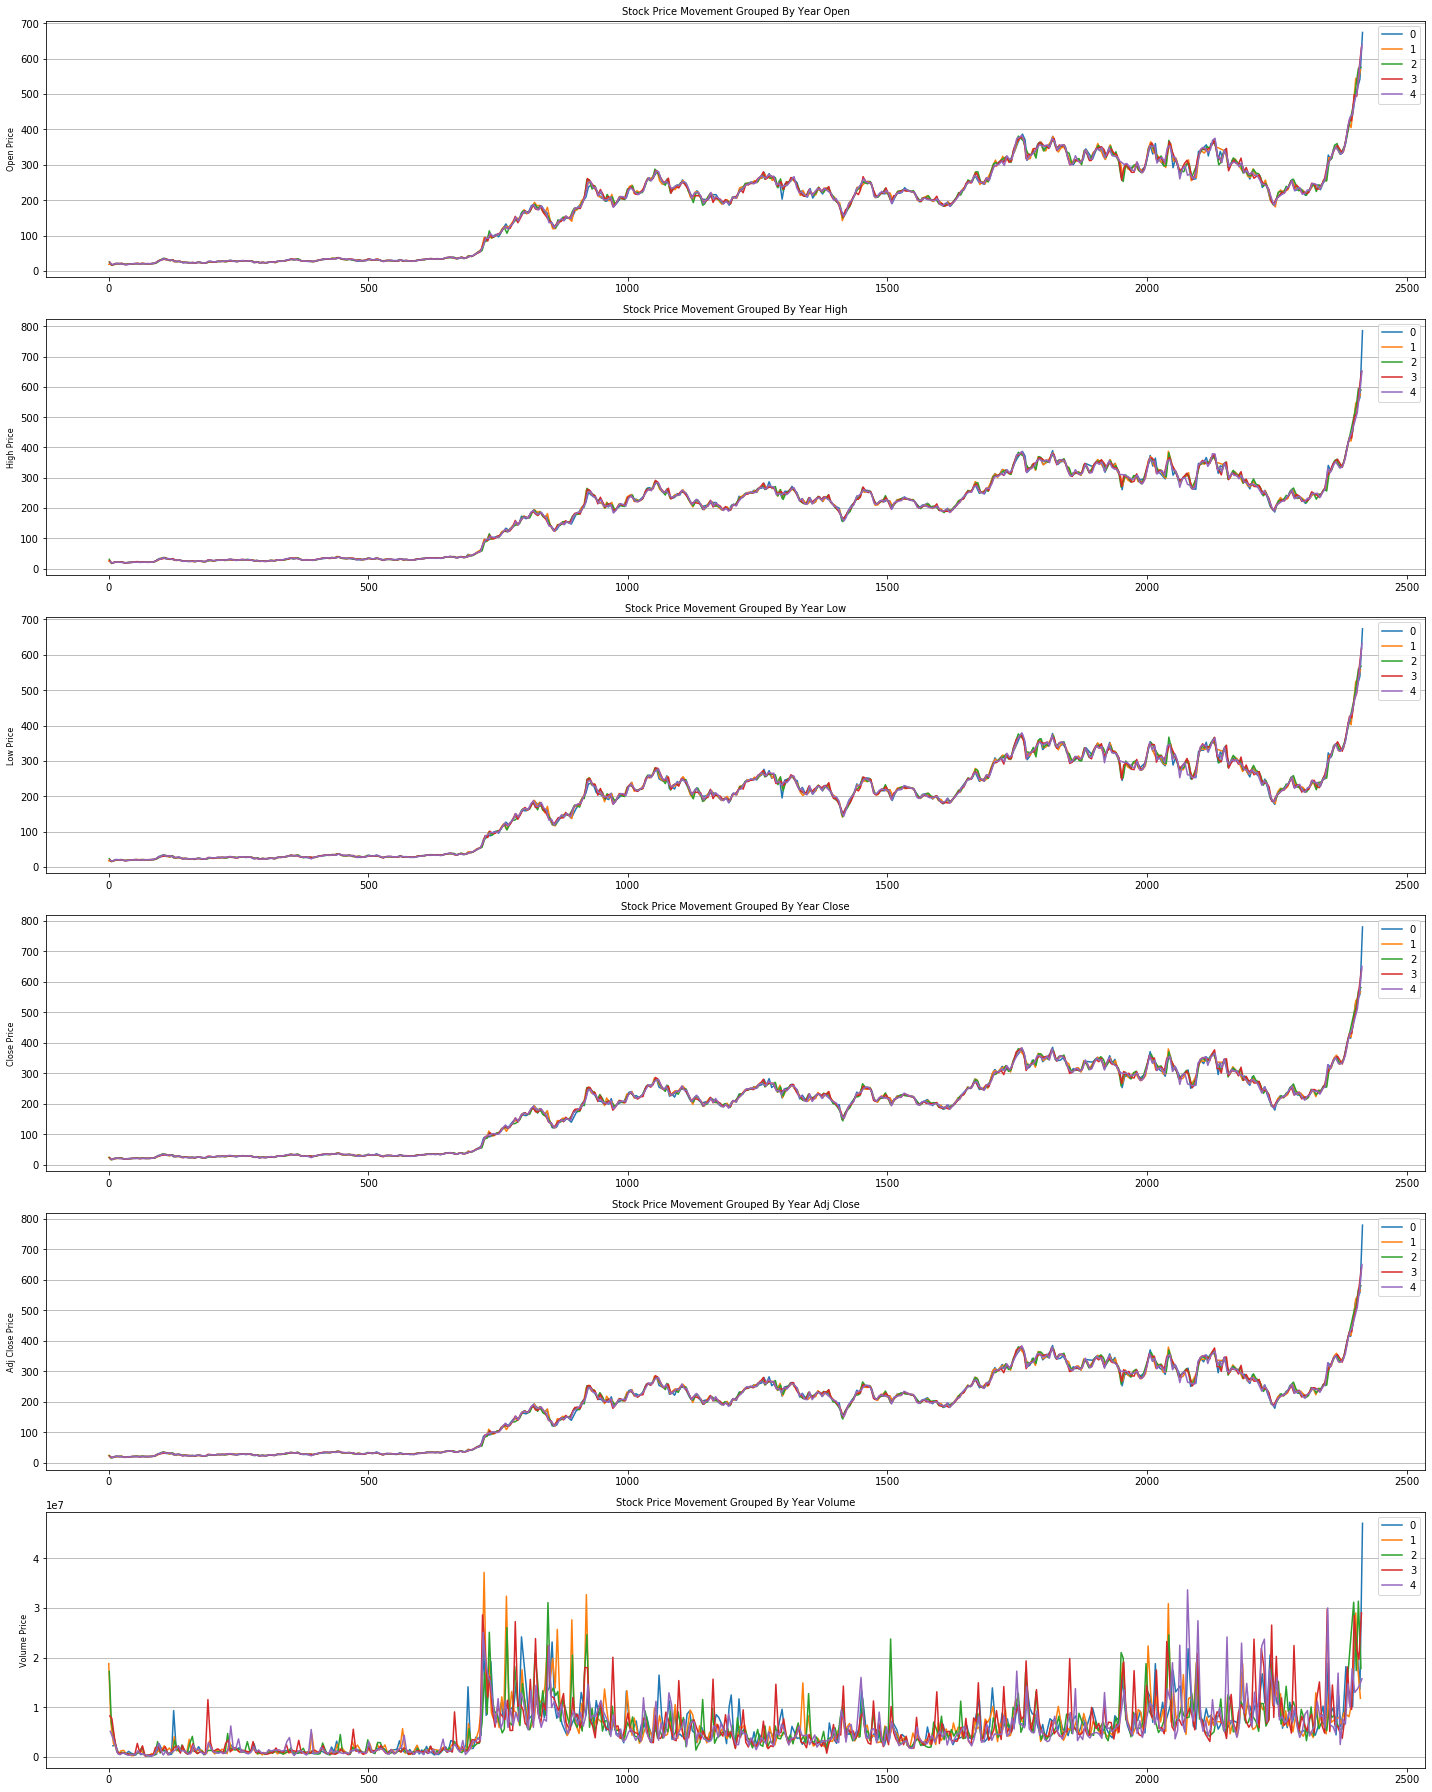

In [73]:
fig, ax=plt.subplots(len(column_list),figsize=(20,25))

# Group the data by year & its plot
for i, coln_lst in enumerate(column_list):
    tesla_stck.groupby('WeekDay')[coln_lst].plot(ax=ax[i],legend=True)
    ax[i].set_title('Stock Price Movement Grouped By Year'+' '+coln_lst,fontsize=10)
    ax[i].set_ylabel(coln_lst+' '+'Price',fontsize=8)
    fig.tight_layout(pad=1.1)
    ax[i].yaxis.grid(True) # Enabling grid lines on Y axis.

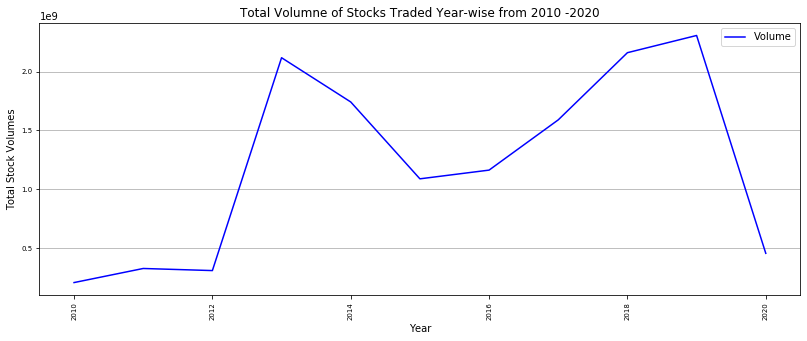

In [86]:
# Visualizing only the total volume of stocks traded grouped year-wise
check = tesla_stck.groupby('Year')['Volume'].sum()
plt.figure(figsize=(30,5))
ax1 = plt.subplot(121)
check.plot(y = 'Volume', legend=True,fontsize=7,title='Total Volumne of Stocks Traded Year-wise from 2010 -2020', rot = 90,color='blue')
ax1.set_ylabel('Total Stock Volumes')
ax1.yaxis.grid(True)

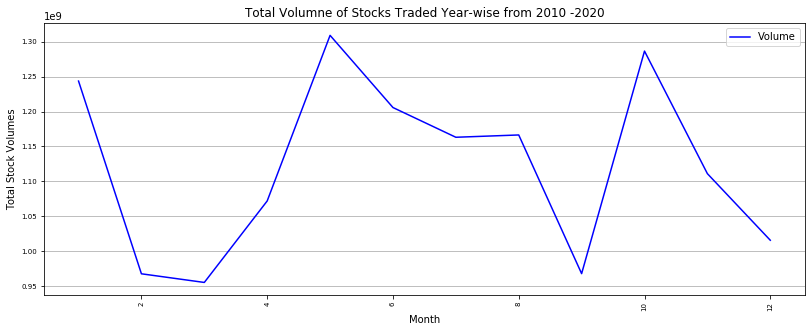

In [87]:
# Visualizing only the total volume of stocks traded grouped year-wise
check = tesla_stck.groupby('Month')['Volume'].sum()
plt.figure(figsize=(30,5))
ax1 = plt.subplot(121)
check.plot(y = 'Volume', legend=True,fontsize=7,title='Total Volumne of Stocks Traded Year-wise from 2010 -2020', rot = 90,color='blue')
ax1.set_ylabel('Total Stock Volumes')
ax1.yaxis.grid(True)

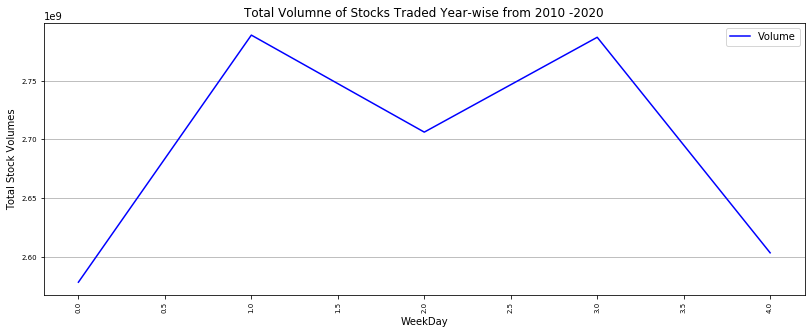

In [88]:
# Visualizing only the total volume of stocks traded grouped year-wise
check = tesla_stck.groupby('WeekDay')['Volume'].sum()
plt.figure(figsize=(30,5))
ax1 = plt.subplot(121)
check.plot(y = 'Volume', legend=True,fontsize=7,title='Total Volumne of Stocks Traded Year-wise from 2010 -2020', rot = 90,color='blue')
ax1.set_ylabel('Total Stock Volumes')
ax1.yaxis.grid(True)

In [91]:
# Analysing it based on Year
for i, coln_lst in enumerate(column_list):
    var = tesla_stck.groupby('Year')[coln_lst].sum() # We found total volume of stock
# Converting the variable into a pandas dataframe
var = pd.DataFrame(var)

In [92]:
var

,Volume
Year,
2010,205369100
2011,325235100
2012,307449000
2013,2118745900
2014,1742321300
2015,1088217800
2016,1162361700
2017,1590031400
2018,2161638800


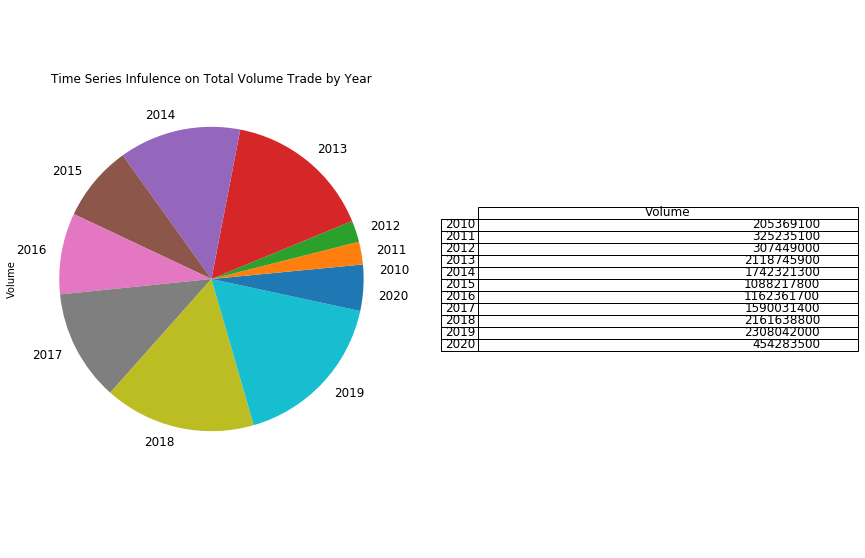

In [104]:
# Plotting to understand the trend using pie charts
plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
var.plot(kind='pie',y = 'Volume',legend=False,fontsize=12,title = 'Time Series Infulence on Total Volume Trade by Year', ax = ax1)
# Plotting the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # sunce we are plotting the table
tbl=table(ax2,var,loc='center')
tbl.set_fontsize(12)
plt.show()

In [108]:
# Analysing it based on Year
for i, coln_lst in enumerate(column_list):
    var = tesla_stck.groupby('Month')[coln_lst].sum() # We found total volume of stock
# Converting the variable into a pandas dataframe
var = pd.DataFrame(var)

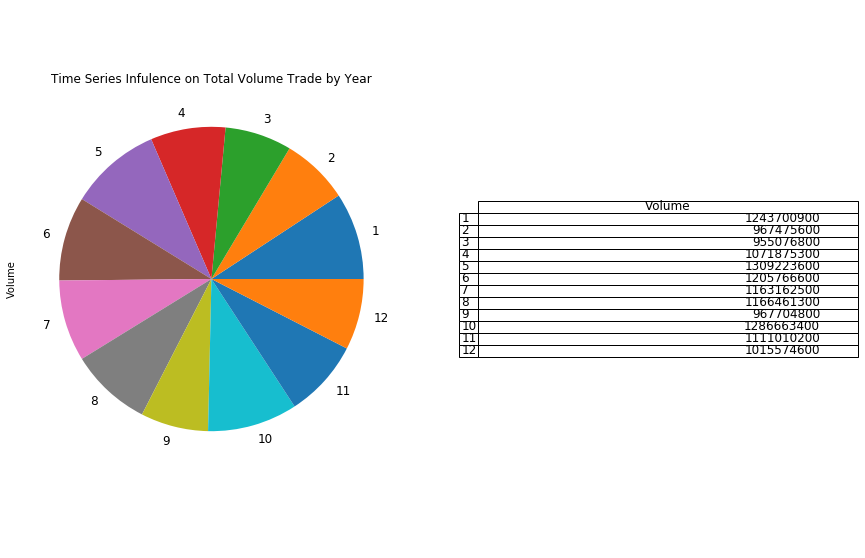

In [110]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
var.plot(kind='pie',y = 'Volume',legend=False,fontsize=12,title = 'Time Series Infulence on Total Volume Trade by Month', ax = ax1)
# Plotting the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # sunce we are plotting the table
tbl=table(ax2,var,loc='center')
tbl.set_fontsize(12)
plt.show()